In [1]:
# MODELLING
# Ensamble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# Naiven
from sklearn.naive_bayes import GaussianNB

# linear
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

# GaussianProcess 
# https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint



from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

/home/micha/anaconda3/envs/hackathon2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import pandas as pd
import numpy as np

# 3.3 RandomSearch+CrossValidation

In [4]:
my_models = [
    RandomForestClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    #GradientBoostingClassifier(),
    #VotingClassifier(estimators=1000),
    GaussianNB(),
    #RidgeClassifier(),
    LogisticRegression()
]

my_models_name = [
    'RandomForestClassifier (Ensamble)',
    'BaggingClassifier (Ensamble)',
    'ExtraTreesClassifier (Ensamble)',
    'AdaBoostClassifier (Ensamble)',
    #'GradientBoostingClassifier (Ensamble)',
    'GaussianNB (NaiveBayes)',
    #'RidgeClassifier (linear)',
    'LogisticRegression (linear)'
]

# ParameterGrid anlegen ... für jedes Modell bzw. Paramtervariationen abdecken

In [5]:
cpu_cores = 7
param_dist = [{"max_depth": [1,3,5,7,9,11,15,20,35, None],
              #"max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 15),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "class_weight": [None],
              "max_leaf_nodes": [None],
              "min_impurity_decrease": [0.0, 0.1, 0.2],
              "min_impurity_split": [None],
              "min_samples_leaf": sp_randint(1, 15),
              "n_estimators": [50,100,200,300.400],
              "n_jobs": [cpu_cores],
              "min_weight_fraction_leaf": [0.0, 0.1, 0.2],
              #"random_state": [None, 42, 132],
              "warm_start": [True, False]
              },
              {"bootstrap": [True, False],
              "bootstrap_features": [True, False],
              #"max_features": sp_randint(1, 11),
              "max_samples": [1.0],
              "n_estimators": [10,50,100,200,500],
              "n_jobs": [cpu_cores],
              #"random_state": [None, 42, 132],
              "warm_start": [True, False]
              },
              {"max_depth": [1,3,5,7,9,11, None],
              #"max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "class_weight": [None],
              "max_leaf_nodes": [None],
              "min_impurity_decrease": [0.0, 0.1, 0.2],
              "min_impurity_split": [None],
              "min_samples_leaf": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "n_estimators": [50,100,200,300,400,500],
              "n_jobs": [cpu_cores],
              "min_weight_fraction_leaf": [0.0, 0.1, 0.2],
              #"random_state": [None, 42, 132],
              "warm_start": [True, False]
              },
              {"algorithm": ['SAMME.R', 'SAMME'],
              "learning_rate": [1.0],
              "n_estimators": [10,50,100,200,500],
              "random_state": [None, 42, 132],
              },
              #{"criterion": ['friedman_mse', 'mse', 'mae'], #mean absolute error (mae).
              #"learning_rate": [0.1],
              #"loss": ['deviance', 'exponential'],
              #"max_depth": sp_randint(3, 7),
              #"min_samples_leaf": sp_randint(1, 11),
              #"min_samples_split": sp_randint(2, 11),
              #"n_estimators": [10,20,30],
              #"min_weight_fraction_leaf": [0.0, 0.1, 0.2],
              #"random_state": [42,],
              #"warm_start": [True, False],
              #"presort": ['auto'],
              #"subsample": [1.0],
              #"tol": [0.0001],
              #"validation_fraction": [0.1]
              #},
              {"var_smoothing": [1e-09] 
              },            
              {"C": [1.0, 0.5, 1.1, 0.9],
              "fit_intercept": [True, False],
              "intercept_scaling": sp_randint(1, 11),
              "l1_ratio": [None],
              "max_iter": [100,200,500,1000],
              "multi_class": ['ovr','multinomial','auto'],
              "n_jobs": [cpu_cores],
              "penalty": ['l2'],
              "tol": [0.0001],
              #"random_state": [None, 42, 132],
              "warm_start": [True, False],
              "solver": ['lbfgs', 'sag', 'saga'],
              }]

#param_dist[0]['max_depth']
#param_dist

In [6]:
#for i in range(len(my_models)):
#    print(my_models[i])

# Bestes Modell mit HyperparamterOptimierung

In [7]:
print(__doc__)
import numpy as np
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.model_selection import KFold


# SupportMethode die die Scores ausgibt und die besten Paramter zurueck gibt
def get_best_params_and_report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0} Mean validation score: {1:.3f} (std: {2:.3f})".format(i,
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            #print("Parameters: {0}".format(results['params'][candidate]))
            #print("")
            if i == 1:
                bestparams = results['params'][candidate]
                bestscore = {'mean':results['mean_test_score'][candidate],'std': results['std_test_score'][candidate]}
    return bestparams, bestscore
#Stellt das beste Modell bereit

def best_opti_fitted_model(model_list,models_name_list,param_dict_list,x,y,xtest,ytest):
    xnew = x
    ynew = y
    xtest = xtest
    ytest = ytest
    
    #die ganzen score arrays ... koennen ausgeduent werden !!!!
    precision_array = []
    accuracy_array = []
    accuracyBalanced_array = []
    recall_array = []
    TPR_array=[]
    TNR_array = []
    Fmeasure_array = []
    name_array = []
    time_to_optimized_hyperParameters = []
    #return Values für die rueckgabe
    bestACC = 0.0
    bestF1 = 0.0
    bestPre = 0.0
    bestRec = 0.0
    bestmodel = 0
    bestscoreList = []
    bestscoreList2 = []
    #RandomizedHyperparamter
    n_iter_search = 10
   
    
    for i in range(len(model_list)):
        #RandomInitializedModel
        random_search = RandomizedSearchCV(my_models[i], param_distributions=param_dict_list[i],n_iter=n_iter_search, cv=5, iid=False)
        start = time()
        random_search.fit(xnew, ynew)
        time_to_optimized_hyperParameters.append(time() - start)
        print("\n######### "+str(models_name_list[i])+" #########")
        print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % (time_to_optimized_hyperParameters[i], n_iter_search))
        bestparams, bestscore = get_best_params_and_report(random_search.cv_results_)
        bestscoreList.append(bestscore['mean'])
        bestscoreList2.append(bestscore['std'])
        model_list[i] = random_search.best_estimator_
        model_list[i].fit(xnew, ynew)

        #Berechnung der Scores
        precision_array.append(precision_score(ytest, model_list[i].predict(xtest)))
        accuracy_array.append(accuracy_score(ytest, model_list[i].predict(xtest)))
        recall_array.append(recall_score(ytest, model_list[i].predict(xtest)))
        TPR_array.append(recall_score(ytest, model_list[i].predict(xtest)))
        TNR_array.append((1-(recall_score(ytest, model_list[i].predict(xtest)))))
        Fmeasure_array.append(2*((precision_array[i]*recall_array[i])/(precision_array[i]+recall_array[i])))
        accuracyBalanced_array.append( (TNR_array[i]+TPR_array[i])/2 )
        name_array.append(models_name_list[i])
       
        #Selektion Section
        tempACC = accuracy_score(ytest, model_list[i].predict(xtest))
        tempPre = precision_score(ytest, model_list[i].predict(xtest))
        tempF1 = 2*((precision_array[i]*recall_array[i])/(precision_array[i]+recall_array[i]))
        tempRec = recall_score(ytest, model_list[i].predict(xtest))
        print(tempACC)
        if bestF1 < tempF1 and bestPre < tempPre and bestRec < tempRec:
        #if bestACC < tempACC:
            print('########  Treffer -> Save -> '+str(name_array[i])+' ########')
            bestACC = tempACC
            bestF1 = tempF1
            bestPre = tempPre
            bestRec = tempRec
            bestIndex = i

            bestmodel = model_list[i]
    d = {'Model': name_array,
    'Precision': precision_array, 
    'Accuracy': accuracy_array, 
    'Balanced Accuracy': accuracyBalanced_array,
    'Recall': recall_array, 
    'TPR': TPR_array, 
    'TNR': TNR_array, 
    'Fmeasure': Fmeasure_array,
    'Opti_MeanValidationScore': bestscoreList,
    'Opti_StdScore': bestscoreList2,
    'Opti_TimeToHyP': time_to_optimized_hyperParameters}
    return pd.DataFrame(data=d), [bestIndex,bestmodel,bestACC,bestPre,bestF1]



Automatically created module for IPython interactive environment


### Reset Data

### Funktionsweise

1. Initialisiert die nötigen Variablen/Container
2. Läuft eine Variationskette von möglichen Modellen durch. ! Für jedes Modell
3. Fittet das beste Modell in die Modellliste
4. Gibt das beste Modell sowie ein DataFrame mit allen nötien Messwerten zurück
### Auswahlkriterium
Die Selektion findet aufgrund der Bedingung statt, dass das Modell mit dem größten Messungen aus F1, Precision und Recall gewählt wird

In [8]:
df = pd.read_pickle('unsw-small.pickle')
df

,duration,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,0.121478,6,258,4,172,0
1,0.649902,14,734,38,42014,0
2,1.623129,8,364,16,13186,0
3,1.681642,12,628,12,770,0
4,0.449454,10,534,6,268,0
...,...,...,...,...,...,...
257668,0.000005,2,104,0,0,0
257669,1.106101,20,18062,8,354,0
257670,0.000000,1,46,0,0,0
257671,0.000000,1,46,0,0,0


In [9]:
#df = df[0:150000]

In [10]:
print(df.shape)
# split into input and output elements
data = df.values
x, y = data[:, :-1], data[:, -1]

print(x.shape, y.shape)

(257673, 6)
(257673, 5) (257673,)


In [11]:
x; y

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
xnew_train, xnew_test, ynew_train, ynew_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(xnew_train.shape)
print(xnew_test.shape)
print(ynew_train.shape)
print(ynew_test.shape)

(206138, 5)
(51535, 5)
(206138,)
(51535,)


In [13]:
import warnings
warnings.simplefilter("ignore")

In [14]:
#Mehtode wird ausgeführt ... kann dauern
dataframe_with_scores, bestmodel = best_opti_fitted_model(my_models,my_models_name,param_dist,xnew_train,ynew_train,xnew_test,ynew_test)


######### RandomForestClassifier (Ensamble) #########
RandomizedSearchCV took 49.98 seconds for 10 candidates parameter settings.
Model with rank: 1 Mean validation score: 0.917 (std: 0.002)
Model with rank: 2 Mean validation score: 0.781 (std: 0.010)
Model with rank: 3 Mean validation score: 0.773 (std: 0.004)
0.9184631803628602
########  Treffer -> Save -> RandomForestClassifier (Ensamble) ########

######### BaggingClassifier (Ensamble) #########
RandomizedSearchCV took 696.41 seconds for 10 candidates parameter settings.
Model with rank: 1 Mean validation score: 0.929 (std: 0.001)
Model with rank: 2 Mean validation score: 0.929 (std: 0.001)
Model with rank: 3 Mean validation score: 0.929 (std: 0.001)
0.9298923061996701

######### ExtraTreesClassifier (Ensamble) #########
RandomizedSearchCV took 57.38 seconds for 10 candidates parameter settings.
Model with rank: 1 Mean validation score: 0.639 (std: 0.000)
Model with rank: 1 Mean validation score: 0.639 (std: 0.000)
Model with rank

# 3.3.1 BestScoredModel

In [15]:
bestmodel

[0,
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=11, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=11, min_samples_split=5,
                        min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=7,
                        oob_score=False, random_state=None, verbose=0,
                        warm_start=True),
 0.9184631803628602,
 0.9091867555707528,
 0.9382204187250058]

# 3.3.2 ScoredModelList

In [16]:
dataframe_with_scores.head(10)

,Model,Precision,Accuracy,Balanced Accuracy,Recall,TPR,TNR,Fmeasure,Opti_MeanValidationScore,Opti_StdScore,Opti_TimeToHyP
0,RandomForestClassifier (Ensamble),0.909187,0.918463,0.5,0.969170,0.969170,0.030830,0.938220,0.917080,0.001654,49.983503
1,BaggingClassifier (Ensamble),0.941787,0.929892,0.5,0.948910,0.948910,0.051090,0.945335,0.928975,0.000951,696.405794
2,ExtraTreesClassifier (Ensamble),0.638828,0.638828,0.5,1.000000,1.000000,0.000000,0.779616,0.639140,0.000010,57.382447
3,AdaBoostClassifier (Ensamble),0.862664,0.876142,0.5,0.958751,0.958751,0.041249,0.908173,0.877698,0.002732,243.654159
4,GaussianNB (NaiveBayes),0.653651,0.372931,0.5,0.039153,0.039153,0.960847,0.073881,0.372071,0.000619,0.189601
5,LogisticRegression (linear),0.672227,0.674901,0.5,0.958417,0.958417,0.041583,0.790208,0.676823,0.003856,450.393185


# 3.3.3 Sorted ScoredModelList

In [17]:
dataframe_with_scores.sort_values(by=['Precision','Fmeasure','Accuracy'], ascending=False).head(10)

,Model,Precision,Accuracy,Balanced Accuracy,Recall,TPR,TNR,Fmeasure,Opti_MeanValidationScore,Opti_StdScore,Opti_TimeToHyP
1,BaggingClassifier (Ensamble),0.941787,0.929892,0.5,0.948910,0.948910,0.051090,0.945335,0.928975,0.000951,696.405794
0,RandomForestClassifier (Ensamble),0.909187,0.918463,0.5,0.969170,0.969170,0.030830,0.938220,0.917080,0.001654,49.983503
3,AdaBoostClassifier (Ensamble),0.862664,0.876142,0.5,0.958751,0.958751,0.041249,0.908173,0.877698,0.002732,243.654159
5,LogisticRegression (linear),0.672227,0.674901,0.5,0.958417,0.958417,0.041583,0.790208,0.676823,0.003856,450.393185
4,GaussianNB (NaiveBayes),0.653651,0.372931,0.5,0.039153,0.039153,0.960847,0.073881,0.372071,0.000619,0.189601
2,ExtraTreesClassifier (Ensamble),0.638828,0.638828,0.5,1.000000,1.000000,0.000000,0.779616,0.639140,0.000010,57.382447


In [18]:
dataframe_with_scores.sort_values(by=['Precision','Fmeasure','Accuracy'], ascending=False).iloc[0:4]

,Model,Precision,Accuracy,Balanced Accuracy,Recall,TPR,TNR,Fmeasure,Opti_MeanValidationScore,Opti_StdScore,Opti_TimeToHyP
1,BaggingClassifier (Ensamble),0.941787,0.929892,0.5,0.948910,0.948910,0.051090,0.945335,0.928975,0.000951,696.405794
0,RandomForestClassifier (Ensamble),0.909187,0.918463,0.5,0.969170,0.969170,0.030830,0.938220,0.917080,0.001654,49.983503
3,AdaBoostClassifier (Ensamble),0.862664,0.876142,0.5,0.958751,0.958751,0.041249,0.908173,0.877698,0.002732,243.654159
5,LogisticRegression (linear),0.672227,0.674901,0.5,0.958417,0.958417,0.041583,0.790208,0.676823,0.003856,450.393185


In [19]:
dataframe_with_scores.sort_values(by=['Fmeasure'], ascending=False).iloc[0:10]

,Model,Precision,Accuracy,Balanced Accuracy,Recall,TPR,TNR,Fmeasure,Opti_MeanValidationScore,Opti_StdScore,Opti_TimeToHyP
1,BaggingClassifier (Ensamble),0.941787,0.929892,0.5,0.948910,0.948910,0.051090,0.945335,0.928975,0.000951,696.405794
0,RandomForestClassifier (Ensamble),0.909187,0.918463,0.5,0.969170,0.969170,0.030830,0.938220,0.917080,0.001654,49.983503
3,AdaBoostClassifier (Ensamble),0.862664,0.876142,0.5,0.958751,0.958751,0.041249,0.908173,0.877698,0.002732,243.654159
5,LogisticRegression (linear),0.672227,0.674901,0.5,0.958417,0.958417,0.041583,0.790208,0.676823,0.003856,450.393185
2,ExtraTreesClassifier (Ensamble),0.638828,0.638828,0.5,1.000000,1.000000,0.000000,0.779616,0.639140,0.000010,57.382447
4,GaussianNB (NaiveBayes),0.653651,0.372931,0.5,0.039153,0.039153,0.960847,0.073881,0.372071,0.000619,0.189601


In [20]:
my_models

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=11, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=11, min_samples_split=5,
                        min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=7,
                        oob_score=False, random_state=None, verbose=0,
                        warm_start=True),
 BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                   max_features=1.0, max_samples=1.0, n_estimators=500, n_jobs=7,
                   oob_score=False, random_state=None, verbose=0,
                   warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='entropy', max_depth=1, max_features='auto',
                      max_leaf_n

In [31]:
import joblib
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

In [26]:
for i in range(len(my_models)):
    joblib.dump(my_models[i], "AI_Cybersecurity_IDS_PoC/analysis/model/"+str(my_models_name[i])+"_HP_opti.joblib")

In [34]:
sns.set(style="ticks", context="talk", rc={'figure.figsize':(10.0,8.00)})
plt.style.use("dark_background")
sns.set_context("talk")
#colormap = sns.color_palette("rocket_r", as_cmap=True)
#colormap = sns.color_palette("YlOrBr", as_cmap=True)
#colormap = sns.color_palette("vlag", as_cmap=True)
colormap = sns.color_palette("light:b", as_cmap=True)
#colormap = sns.color_palette("magma", as_cmap=True)

# 3.3.4 Performance Visualitation

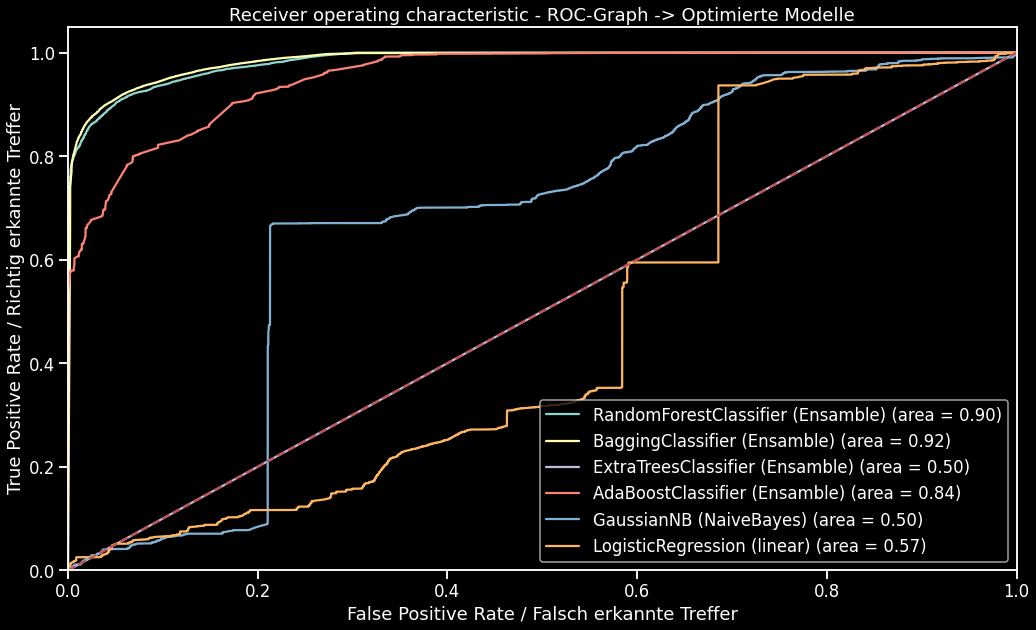

In [35]:
rf_roc_auc_array = []
fpr_array = []
tpr_array = []
thresholds_array = []



plt.figure(figsize=(17,10))
for i in range(len(my_models)):
    rf_roc_auc_array.append(roc_auc_score(ynew_test, my_models[i].predict(xnew_test)))
    fpr, tpr, thresholds = roc_curve(ynew_test, my_models[i].predict_proba(xnew_test)[:,1])
    fpr_array.append(fpr)
    tpr_array.append(tpr)
    thresholds_array.append(thresholds)
    plt.plot(fpr, tpr, label=my_models_name[i]+' (area = %0.2f)' % rf_roc_auc_array[i])

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate / Falsch erkannte Treffer')
plt.ylabel('True Positive Rate / Richtig erkannte Treffer')
plt.title('Receiver operating characteristic - ROC-Graph -> Optimierte Modelle')
plt.legend(loc="lower right")
plt.savefig('RF_ROC_opti3')
plt.show()

<table>
  <thead>
    <tr>
      <th>Standard ModelConfig</th>
      <th>Optimized ModelConfig</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><img src="RF_ROC.png" alt="RF_ROC-StandardModels" title="" /></td>
      <td><img src="RF_ROC_opti3.png" alt="RF_ROC-OptiModels" title="" /></td>
    </tr>
  </tbody>
</table>